In [36]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import matplotlib.pyplot as plot                     
get_ipython().run_line_magic('matplotlib', 'inline')
import seaborn as sns

from sklearn.model_selection import train_test_split

In [37]:
missing_values = ["n/a", "na", "--","?"]
df = pd.read_csv (r"C:/Users/Kesego/Documents/me/simple-machine-learning-algorithm/FyntraCustomerData.csv" , na_values = missing_values) 

In [38]:
df.head()


,Email,Address,Avatar,Avg_Session_Length,Time_on_App,Time_on_Website,Length_of_Membership,Yearly_Amount_Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [39]:
df

,Email,Address,Avatar,Avg_Session_Length,Time_on_App,Time_on_Website,Length_of_Membership,Yearly_Amount_Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092
...,...,...,...,...,...,...,...,...
495,lewisjessica@craig-evans.com,"4483 Jones Motorway Suite 872\nLake Jamiefurt,...",Tan,33.237660,13.566160,NaN,3.746573,573.847438
496,katrina56@gmail.com,"172 Owen Divide Suite 497\nWest Richard, CA 19320",PaleVioletRed,34.702529,11.695736,37.190268,3.576526,529.049004
497,dale88@hotmail.com,"0787 Andrews Ranch Apt. 633\nSouth Chadburgh, ...",Cornsilk,NaN,11.499409,38.332576,4.958264,551.620146
498,cwilson@hotmail.com,"680 Jennifer Lodge Apt. 808\nBrendachester, TX...",Teal,33.322501,12.391423,36.840086,2.336485,456.469510


In [32]:
median = df['Time_on_Website'].mode()
df['Time_on_Website'].fillna(median, inplace=True)

In [33]:
df.replace('?', None)

,Email,Address,Avatar,Avg_Session_Length,Time_on_App,Time_on_Website,Length_of_Membership,Yearly_Amount_Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.49726773,12.65565115,39.57766802,4.082620633,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.92627203,11.10946073,37.26895887,2.664034182,392.2049334
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.00091476,11.33027806,37.11059744,4.104543202,487.5475049
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.30555663,13.71751367,36.72128268,3.120178783,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.33067252,12.79518855,37.5366533,4.446308318,599.406092
...,...,...,...,...,...,...,...,...
495,lewisjessica@craig-evans.com,"4483 Jones Motorway Suite 872\nLake Jamiefurt,...",Tan,33.23765998,13.56615961,37.96597162,3.746572973,573.8474377
496,katrina56@gmail.com,"172 Owen Divide Suite 497\nWest Richard, CA 19320",PaleVioletRed,34.70252897,11.69573629,37.19026771,3.576525915,529.0490041
497,dale88@hotmail.com,"0787 Andrews Ranch Apt. 633\nSouth Chadburgh, ...",Cornsilk,34.70252897,11.49940906,38.33257633,4.958264473,551.6201455
498,cwilson@hotmail.com,"680 Jennifer Lodge Apt. 808\nBrendachester, TX...",Teal,33.32250105,12.39142299,36.84008573,2.336484668,456.4695101


In [40]:
df.Avg_Session_Length.fillna(df.Avg_Session_Length.mode()[0], inplace=True)
df.Time_on_App.fillna(df.Time_on_App.mode()[0], inplace=True)
df.Time_on_Website.fillna(df.Time_on_Website.mode()[0], inplace=True)
df.Length_of_Membership.fillna(df.Length_of_Membership.mode()[0], inplace=True)
df.Yearly_Amount_Spent.fillna(df.Yearly_Amount_Spent.mode()[0], inplace=True)


In [41]:
df['Time_on_Website']

0      39.577668
1      37.268959
2      37.110597
3      36.721283
4      37.536653
         ...    
495    33.913847
496    37.190268
497    38.332576
498    36.840086
499    35.771016
Name: Time_on_Website, Length: 500, dtype: float64

In [42]:
df.isnull().values.any()

False

In [43]:
df.describe()

,Avg_Session_Length,Time_on_App,Time_on_Website,Length_of_Membership,Yearly_Amount_Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,32.921215,11.988685,37.009619,3.434668,498.258993
std,1.178715,1.092713,1.086368,1.143644,80.768260
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.269387,11.350103,36.311681,2.876568,444.580660
50%,33.027876,11.969324,37.063155,3.489562,497.795286
75%,33.696273,12.726862,37.713378,4.124835,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


In [44]:
cols = ['Time_on_Website', 'Yearly_Amount_Spent']
df[cols] = df[cols].apply(pd.to_numeric, errors='coerce', axis=1)

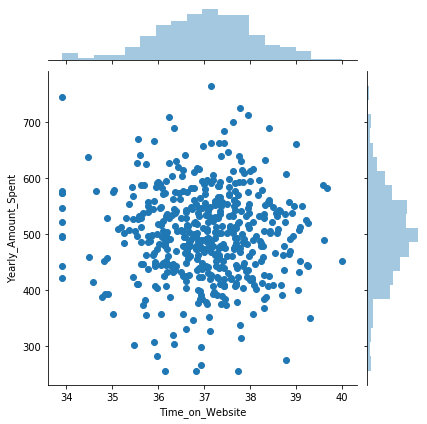

In [45]:
datafr =pd.DataFrame(df)
sns.jointplot(x="Time_on_Website", y="Yearly_Amount_Spent", data=df);

In [46]:
cols = ['Avg_Session_Length', 'Time_on_App', 'Time_on_Website', 'Length_of_Membership', 'Yearly_Amount_Spent']
df[cols] = df[cols].apply(pd.to_numeric, errors='coerce', axis=1)

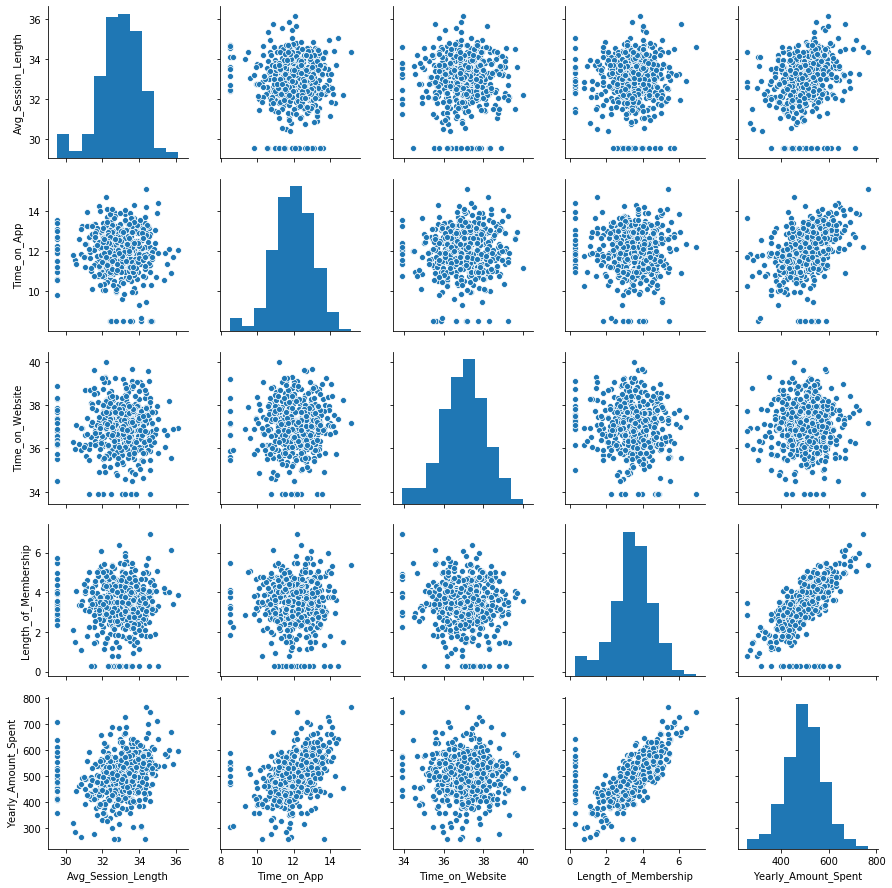

In [47]:
sns.pairplot(df)

In [48]:
df.corr()

,Avg_Session_Length,Time_on_App,Time_on_Website,Length_of_Membership,Yearly_Amount_Spent
Avg_Session_Length,1.000000,-0.027315,-0.001806,0.011539,0.258962
Time_on_App,-0.027315,1.000000,0.051061,-0.008035,0.424826
Time_on_Website,-0.001806,0.051061,1.000000,-0.096601,-0.018462
Length_of_Membership,0.011539,-0.008035,-0.096601,1.000000,0.686399
Yearly_Amount_Spent,0.258962,0.424826,-0.018462,0.686399,1.000000


In [49]:
df.head()

,Email,Address,Avatar,Avg_Session_Length,Time_on_App,Time_on_Website,Length_of_Membership,Yearly_Amount_Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
Email                   500 non-null object
Address                 500 non-null object
Avatar                  500 non-null object
Avg_Session_Length      500 non-null float64
Time_on_App             500 non-null float64
Time_on_Website         500 non-null float64
Length_of_Membership    500 non-null float64
Yearly_Amount_Spent     500 non-null float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


In [51]:
df.columns

Index(['Email', 'Address', 'Avatar', 'Avg_Session_Length', 'Time_on_App',
       'Time_on_Website', 'Length_of_Membership', 'Yearly_Amount_Spent'],
      dtype='object')

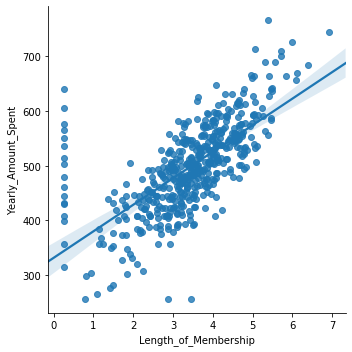

In [52]:
cols = ['Length_of_Membership', 'Yearly_Amount_Spent']
df[cols] = df[cols].apply(pd.to_numeric, errors='coerce', axis=1)

sns.lmplot(x="Length_of_Membership", y="Yearly_Amount_Spent", data=df);

In [53]:
X=df[['Avg_Session_Length','Time_on_App','Time_on_Website','Length_of_Membership']]

In [54]:
y=df[['Yearly_Amount_Spent']]

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [56]:
lm = LinearRegression()

In [57]:
lm.fit(X_train,y_train)
LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [58]:
print (lm.intercept_)

[-658.00754065]


In [59]:
predictions = lm.predict(X_test)

In [60]:
predictions[0:5]

array([[479.6238046 ],
       [436.30882635],
       [442.62499161],
       [578.28726599],
       [580.25248956]])

Text(0, 0.5, 'Predicted data')

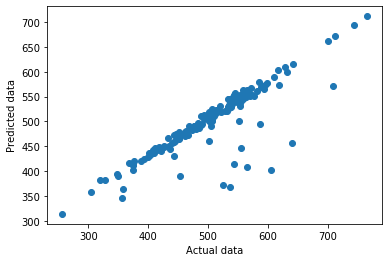

In [61]:
plot.scatter(y_test, predictions)
plot.xlabel("Actual data")
plot.ylabel("Predicted data")

In [62]:
print('The RSME is ', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

The RSME is  43.79761276526763
